# CNN Playground

### Download data

In [1]:
import zipfile

# Download file zip hình ảnh pizza_steak
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Giải nén file đã tải
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [2]:
# Lấy dữ liệu (10% nhãn)
# Download dữ liệu
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# # Giải nén dữ liệu đã download 
# zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [3]:
#!brew install tree
!tree pizza_steak/train -d
    

pizza_steak/train
├── pizza
└── steak

2 directories


In [4]:
!tree pizza_steak/test -d

pizza_steak/test
├── pizza
└── steak

2 directories


In [5]:
import os

def count_files(dir):
    print(f"{dir} has {len(os.listdir(dir))} files")

train_path = 'pizza_steak/train'
test_path = 'pizza_steak/test'

count_files(train_path+'/pizza')
count_files(train_path+'/steak')
count_files(test_path+'/pizza')
count_files(test_path+'/steak')

pizza_steak/train/pizza has 750 files
pizza_steak/train/steak has 750 files
pizza_steak/test/pizza has 250 files
pizza_steak/test/steak has 250 files


In [6]:
# Tạo classname từ list dir
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [7]:
data_dir.glob('*')

<generator object Path.glob at 0x7f97c16f6d50>

In [8]:
for item in data_dir.glob('*'):
    print(item.name)

steak
pizza


In [9]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


### Visualization

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Get random image

In [11]:
def view_random_image(target_dir: str, target_class: str):
    target_folder = target_dir+'/'+target_class
    random_file_name = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_file_name[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img
    

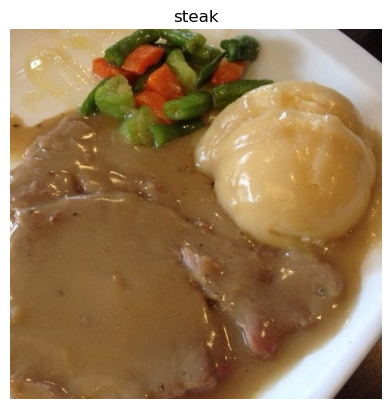

In [12]:
random_train_image = view_random_image(train_path, 'steak')

In [13]:
type(random_train_image)

numpy.ndarray

In [14]:
random_train_image.shape

(509, 512, 3)

### Baseline

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_data_gen.flow_from_directory(train_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)
test_data = train_data_gen.flow_from_directory(test_dir, 
                                                batch_size=32, 
                                                target_size=(224,224), 
                                                class_mode = "binary", 
                                                seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

2022-10-13 07:10:47.090795: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 07:10:47.091279: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 117s 2s/step - loss: 0.5706 - accuracy: 0.6967 - val_loss: 0.4090 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 120s 3s/step - loss: 0.4283 - accuracy: 0.7980 - val_loss: 0.3953 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 117s 2s/step - loss: 0.3949 - accuracy: 0.8233 - val_loss: 0.3318 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.3589 - accuracy: 0.8433 - val_loss: 0.3225 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 120s 3s/step - loss: 0.3342 - accuracy: 0.8547 - val_loss: 0.3647 - val_accuracy: 0.8500


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#### Test mô hình đơn giản

In [20]:
model_2 = Sequential([
    Flatten(input_shape = (224,224,3)),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6949 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [21]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


#### Thử tăng độ phức tạp của mô hình bình thường, tăng số hidden layer cũng như tăng số nơ ron mỗi layer

In [24]:
tf.random.set_seed(42)
model_3 = Sequential([Flatten(input_shape=(224,224,3)),
                      Dense(100, activation='relu'),
                      Dense(100, activation='relu'),
                      Dense(100, activation='relu'),
                      Dense(1, activation='sigmoid')
                      ])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 16s 330ms/step - loss: 2.6558 - accuracy: 0.6367 - val_loss: 1.6336 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 15s 315ms/step - loss: 1.0625 - accuracy: 0.7000 - val_loss: 0.4725 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 15s 323ms/step - loss: 0.7539 - accuracy: 0.7207 - val_loss: 0.4603 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 15s 324ms/step - loss: 0.4560 - accuracy: 0.7973 - val_loss: 0.5543 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 15s 323ms/step - loss: 0.6611 - accuracy: 0.7320 - val_loss: 0.4268 - val_accuracy: 0.7980


In [23]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Chia nhỏ bài toán qua các bước

### 1. Tìm hiểu dữ liệu (trực quan hoá)

Nên trực quan hoá từ 10 đến 100 sample

In [38]:
!tree pizza_steak -d 

pizza_steak
├── test
│   ├── pizza
│   └── steak
└── train
    ├── pizza
    └── steak

6 directories


Text(0.5, 1.0, 'Pizza')

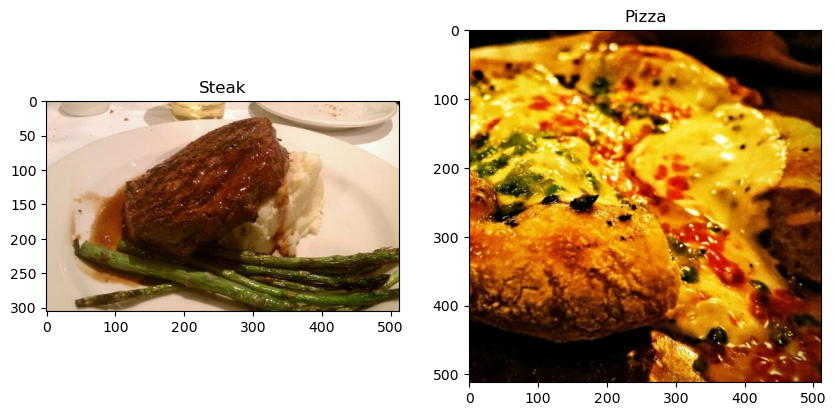

In [37]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
steak_path = 'pizza_steak/train/steak/'
pizza_path = 'pizza_steak/train/pizza/'
random_steak_name = random.sample(os.listdir(steak_path), 1)
random_pizza_name = random.sample(os.listdir(pizza_path), 1)
steak_image = mpimg.imread(steak_path+random_steak_name[0])
pizza_image = mpimg.imread(pizza_path+random_pizza_name[0])

axes[0].imshow(steak_image)
axes[0].set_title('Steak')
axes[1].imshow(pizza_image)
axes[1].set_title('Pizza')

### 2. Tiền xử lý dữ liệu (chuẩn bị cho mô hình)

Đầu ra cho quá trình này là train data, test data đã chia batch

In [39]:
!tree pizza_steak -d

pizza_steak
├── test
│   ├── pizza
│   └── steak
└── train
    ├── pizza
    └── steak

6 directories


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)


train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                batch_size=32)
test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32)
                                                

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Text(0.5, 1.0, '1.0')

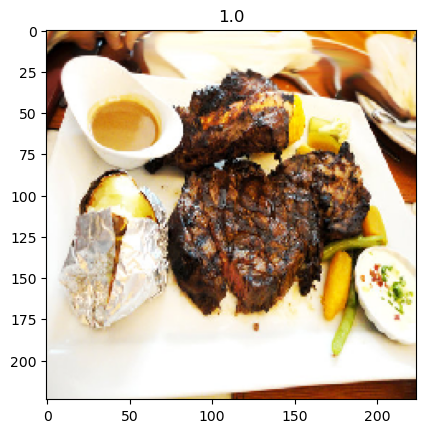

In [48]:
image, label = train_data.next()

plt.imshow(image[0])
plt.title(label[0])

### 3. Tạo mô hình (bắt đầu với baseline)

Nó tuân theo cấu trúc CNN điển hình của:

```
Input -> Conv + ReLU layers (non-linearities) X3 times  -> Fully connected (dense layer) as Output
```

In [49]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

### 4. Khớp mô hình

In [50]:
model_4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data)
            )

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 90s 2s/step - loss: 1.1905 - accuracy: 0.6507 - val_loss: 0.4777 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 86s 2s/step - loss: 0.4275 - accuracy: 0.8093 - val_loss: 0.3611 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 85s 2s/step - loss: 0.3245 - accuracy: 0.8700 - val_loss: 0.3941 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 85s 2s/step - loss: 0.2593 - accuracy: 0.9007 - val_loss: 0.3518 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.1048 - accuracy: 0.9667 - val_loss: 0.3937 - val_accuracy: 0.8340


### 5. Đánh giá mô hình

Training curve

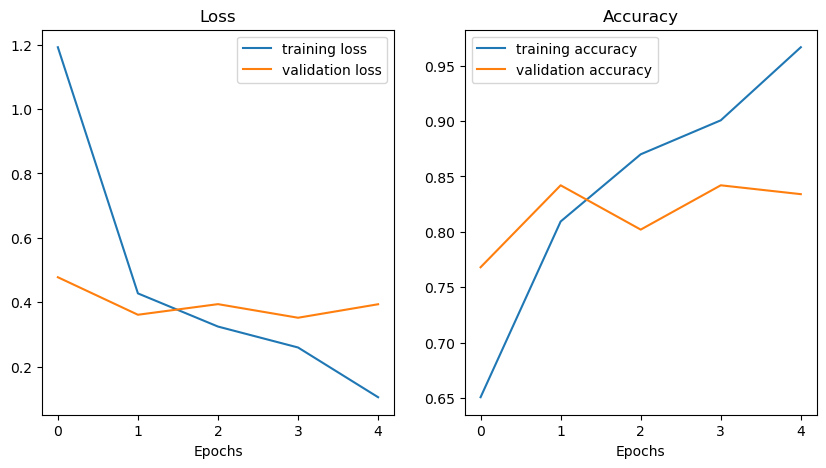

In [54]:
# plot history_4
import pandas as pd

def plot_history(history):
    training_loss = history.history['loss']
    training_acc = history.history['accuracy']
    
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.plot(epochs, training_loss, label='training loss')
    ax1.plot(epochs, val_loss, label='validation loss')
    ax1.set_title('Loss')
    ax1.legend()
    ax1.set_xlabel('Epochs')
    
    ax2.plot(epochs, training_acc, label='training accuracy')
    ax2.plot(epochs, val_acc, label='validation accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    ax2.set_xlabel('Epochs')
    
plot_history(history_4)
    

In [55]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_5 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Đánh giá các tham số khác nhau và cải thiện mô hình, vượt lên baseline

Mô hình đang bị overfiting, giờ cần cải thiện giảm overfit.

- Dùng max pooling
- Dùng max pooling và data augmentation

In [56]:
# Mô hình sẽ giống với mô hình số 4 nhưng sẽ thêm MaxPool2D vào

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Train for 47 steps, validate for 16 steps
Epoch 1/5
47/47 [==============================] - 93s 2s/step - loss: 0.6437 - accuracy: 0.6000 - val_loss: 0.5482 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.4662 - accuracy: 0.7847 - val_loss: 0.3654 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 91s 2s/step - loss: 0.4336 - accuracy: 0.8120 - val_loss: 0.3923 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 90s 2s/step - loss: 0.4080 - accuracy: 0.8213 - val_loss: 0.3512 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 90s 2s/step - loss: 0.3718 - accuracy: 0.8407 - val_loss: 0.3158 - val_accuracy: 0.8840


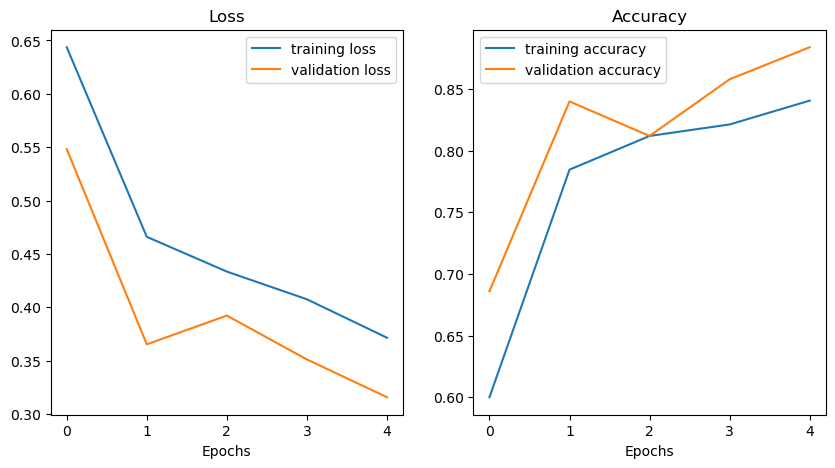

In [57]:
plot_history(history_5)

In [58]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

Thử Tăng cường dữ liệu

In [59]:
# Tạo ImageDataGenerator training instance với data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # xoay hình một chút trong khoảng 0-20 độ (lưu ý: đây là int, không phải float)
                                             shear_range=0.2, # cắt ảnh
                                             zoom_range=0.2, # phóng to ảnh
                                             width_shift_range=0.2, # dịch chuyển ảnh theo chiều rộng
                                             height_shift_range=0.2, # dịch chuyển ảnh theo chiều cao
                                             horizontal_flip=True) # lật ảnh trên trục hoành

# Tạo ImageDataGenerator training instance mà không có data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Tạo ImageDataGenerator test instance mà không có data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [60]:
# Import dữ liệu và tăng cường nó từ training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Không xáo trộn cho mục đích mô phỏng

# Tạo các non-augmented data batch
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Không xáo trộn cho mục đích mô phỏng

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


### 7. Lặp lại cho đến khi thoả mãn